In [1]:
import warnings
warnings.filterwarnings('ignore')
import datetime
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("Interview.csv")
#df.head(5)
#df.info()


In [3]:
df.drop(['Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Name(Cand ID)'],axis=1,inplace=True)
df.drop(1233, inplace=True)

In [4]:
df.columns = ['Date', 'Client', 'Industry', 'Location', 'Position', 'Skillset', 'Interview_Type', 
                     'Gender', 'Curr_Location', 'Job_Location', 'Venue', 'Native_Loc', 'Necc_Perm', 'No_random_meet', 
                      'Call_3_hours', 'Alternative_Number', 'Printout_resume', 'Details_Clear_Landmark', 
                      'Shared_Letter', 'Exp_Attendance', 'Ob_Attendance', 'Martial_Status']
df.head()

,Date,Client,Industry,Location,Position,Skillset,Interview_Type,Gender,Curr_Location,Job_Location,Venue,Native_Loc,Necc_Perm,No_random_meet,Call_3_hours,Alternative_Number,Printout_resume,Details_Clear_Landmark,Shared_Letter,Exp_Attendance,Ob_Attendance,Martial_Status
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Hosur,Hosur,Hosur,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,Hosur,Trichy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,Hosur,Chennai,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,Hosur,Chennai,Yes,Yes,No,Yes,No,Yes,Yes,Uncertain,No,Single
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Bangalore,Hosur,Chennai,Yes,Yes,Yes,No,Yes,Yes,Yes,Uncertain,No,Married


In [5]:
missing_df=df.isnull().sum()
print((missing_df/len(df))*100)

Date                       0.000000
Client                     0.000000
Industry                   0.000000
Location                   0.000000
Position                   0.000000
Skillset                   0.000000
Interview_Type             0.000000
Gender                     0.000000
Curr_Location              0.000000
Job_Location               0.000000
Venue                      0.000000
Native_Loc                 0.000000
Necc_Perm                 16.545012
No_random_meet            20.032441
Call_3_hours              20.032441
Alternative_Number        20.032441
Printout_resume           20.113544
Details_Clear_Landmark    20.113544
Shared_Letter             19.870235
Exp_Attendance             0.405515
Ob_Attendance              0.000000
Martial_Status             0.000000
dtype: float64


# DATA CLEANING

In [6]:
for column in df.columns:
    print(column,df[column].unique())
    print('**'*40)

Date ['13.02.2015' '19.06.2015' '23.06.2015' '29.06.2015' '25.06.2015'
 '25.05.16' '25.5.2016' '25-05-2016' '25.05.2016' '25-5-2016' '04/12/16'
 '13.04.2016' '27.02.2016' '07.05.2016' '5.5.16' '4.5.16' '21.4.16'
 '22.4.16' '23.4.16' '15 Apr 16' '19 Apr 16' '20 Apr 16' '21-Apr -16'
 '22 -Apr -16' '25 – Apr-16' '25 Apr 16' '18 Apr 16' '11.5.16' '10.5.16'
 '11.05.16' '12.04.2016' '12.04.2017' '12.04.2018' '12.04.2019'
 '12.04.2020' '12.04.2021' '12.04.2022' '12.04.2023' '8.5.16' '7.5.16'
 '19.03.16' '24.05.2016' '05/11/2016' '26/05/2016' '10.05.2016'
 '28.08.2016 & 09.00 AM' '28.08.2016 & 9.30 AM' '28.8.2016 & 12.00 PM'
 '28.08.2016 & 09.30 AM' '28.8.2016 & 10.30 AM' '28.8.2016 & 09.30 AM'
 '28.8.2016 & 04.00 PM' '28.08.2016 & 11.30 AM' '28.08.2016 & 11.00 AM'
 '28.08.2016 & 10.30 AM' '28.8.2016 & 03.00 PM' '28.08.2016 & 10.00 AM'
 '28.8.2016 & 02.00 PM' '28.8.2016 & 11.00 AM' '13.06.2016' '02.09.2016'
 '02.12.2015' '23.02.2016' '22.03.2016' '26.02.2016' '06.02.2016'
 '21.4.2016' '21/04/1

In [7]:
df['Client'].value_counts()

Standard Chartered Bank            904
Pfizer                              75
Hospira                             75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Prodapt                             17
Standard Chartered Bank Chennai     17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client, dtype: int64

In [8]:
df.Client.replace(['Aon Hewitt', 'Hewitt', 'Aon hewitt Gurgaon'], 'Hewitt', inplace=True)
df.Client.replace(['Standard Chartered Bank', 'Standard Chartered Bank Chennai'], 
                            'Standard Chartered', inplace=True)

In [9]:
df['Client'].value_counts()

Standard Chartered    921
Pfizer                 75
Hospira                75
Hewitt                 50
Flextronics            23
ANZ                    22
UST                    18
Prodapt                17
Astrazeneca            15
Williams Lea           11
Barclays                5
Woori Bank              1
Name: Client, dtype: int64

In [10]:
df.loc[df['Client']!='Standard Chartered','Client']='Others'

In [11]:
df['Client'].value_counts()

Standard Chartered    921
Others                312
Name: Client, dtype: int64

In [12]:
df["Ob_Attendance"]= df["Ob_Attendance"].str.upper()
df.Ob_Attendance.replace(['YES', 'YES '], 'yes', inplace=True)
df.Ob_Attendance.replace(['NO', 'NO '], 'no', inplace=True)
print(df['Ob_Attendance'].value_counts())

yes    783
no     450
Name: Ob_Attendance, dtype: int64


In [13]:
df.Industry.replace(['IT Services', 'IT Products and Services', 'IT'],'IT', inplace=True)

In [14]:
df['Industry'].value_counts()

BFSI               949
Pharmaceuticals    165
IT                  79
Electronics         23
Telecom             17
Name: Industry, dtype: int64

In [15]:
def merge_categories(column_name, threshold, merged_name=''):
    column_counts = df[column_name].value_counts()
    to_merge = column_counts[column_counts < threshold].index
    df.loc[df[column_name].isin(to_merge), column_name] = merged_name

In [16]:
merge_categories('Industry',200, 'Others')
df['Industry'].value_counts()

BFSI      949
Others    284
Name: Industry, dtype: int64

In [17]:
df['Position'].value_counts()

Routine                1023
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Production- Sterile       5
Selenium testing          5
Name: Position, dtype: int64

In [18]:
df.loc[df['Position']!='Routine','Position']='Others'
df['Position'].value_counts()

Routine    1023
Others      210
Name: Position, dtype: int64

In [19]:
df['Interview_Type'].value_counts()

Scheduled Walk In    456
Scheduled            371
Scheduled Walkin     189
Walkin               189
Walkin                27
Sceduled walkin        1
Name: Interview_Type, dtype: int64

In [20]:
replace_dict = {
    'Scheduled Walk In': 'Scheduled Walkin',
    'Sceduled walkin': 'Scheduled Walkin',
    'Walkin ': 'Walkin' ,'Scheduled ':'Scheduled Walkin'
}
df['Interview_Type'].replace(replace_dict, inplace=True)
df['Interview_Type'].value_counts()

Scheduled Walkin    1017
Walkin               216
Name: Interview_Type, dtype: int64

In [21]:
df.Location.replace(['chennai', 'Chennai', 'chennai ', 'CHENNAI'], 'Chennai', inplace=True)
df.Location.replace('- Cochin- ', 'Cochin', inplace=True)
df.Location.replace('Gurgaonr', 'Gurgaon', inplace=True)

df.Curr_Location.replace(['chennai', 'Chennai', 'chennai ', 'CHENNAI'], 'Chennai', inplace=True)
df.Curr_Location.replace('- Cochin- ', 'Cochin', inplace=True)

df.Job_Location.replace('- Cochin- ', 'Cochin', inplace=True)

df.Venue.replace('- Cochin- ', 'Cochin', inplace=True)

In [22]:
print(df['Location'].value_counts())
print(df['Curr_Location'].value_counts())
print(df['Job_Location'].value_counts())
print(df['Venue'].value_counts())

Chennai      844
Bangalore    292
Hyderabad     38
Gurgaon       34
Noida         15
Cochin         9
Delhi          1
Name: Location, dtype: int64
Chennai      844
Bangalore    292
Hyderabad     38
Gurgaon       34
Noida         15
Cochin         9
Delhi          1
Name: Curr_Location, dtype: int64
Chennai          893
Bangalore        259
Gurgaon           35
Visakapatinam     21
Noida             15
Cochin             9
Hosur              1
Name: Job_Location, dtype: int64
Chennai      852
Bangalore    277
Hyderabad     40
Gurgaon       35
Noida         15
Cochin         9
Hosur          5
Name: Venue, dtype: int64


In [23]:
df.drop(['Location'],axis=1,inplace=True) #Redundant

In [24]:
df['interview_venue_same_as_current_location'] = df['Curr_Location'] == df['Venue']
df['interview_venue_same_as_native_location'] = df['Native_Loc'] == df['Venue']

In [25]:
df['interview_venue_same_as_current_location'].value_counts()
df['interview_venue_same_as_native_location'].value_counts()

True     767
False    466
Name: interview_venue_same_as_native_location, dtype: int64

In [26]:
df.loc[df['Curr_Location']!='Chennai','Curr_Location']='Others'
df.loc[df['Job_Location']!='Chennai','Job_Location']='Others'
print(df['Curr_Location'].value_counts())
print(df['Job_Location'].value_counts())

Chennai    844
Others     389
Name: Curr_Location, dtype: int64
Chennai    893
Others     340
Name: Job_Location, dtype: int64


In [27]:
merge_categories('Native_Loc',500,'Others')

In [28]:
df["Native_Loc"].value_counts()

Others     638
Chennai    595
Name: Native_Loc, dtype: int64

In [29]:
merge_categories('Venue', 300,'Others')
print(df['Venue'].value_counts())

Chennai    852
Others     381
Name: Venue, dtype: int64


In [30]:
print(df['Printout_resume'].value_counts())
print(df['Necc_Perm'].value_counts())
print(df['No_random_meet'].value_counts())
print(df['Call_3_hours'].value_counts())
print(df['Shared_Letter'].value_counts())
print(df['Details_Clear_Landmark'].value_counts())
print(df['Alternative_Number'].value_counts())

Yes                      940
Na                        19
No                        16
Not Yet                    4
yes                        2
Not yet                    2
No- will take it soon      1
na                         1
Name: Printout_resume, dtype: int64
Yes               917
No                 79
Not yet            19
Na                  5
yes                 4
Yet to confirm      4
NO                  1
Name: Necc_Perm, dtype: int64
Yes         949
Na           20
No            6
yes           5
Not sure      4
Not Sure      1
cant Say      1
Name: No_random_meet, dtype: int64
Yes        951
Na          20
No          10
yes          4
No Dont      1
Name: Call_3_hours, dtype: int64
Yes               932
Na                 19
No                 17
Not Sure            8
Need To Check       3
yes                 2
Not yet             2
Havent Checked      1
Yet to Check        1
Not sure            1
no                  1
na                  1
Name: Shared_Letter, dtype: i

In [31]:
question_columns=['Printout_resume','Necc_Perm','No_random_meet','Call_3_hours','Shared_Letter','Details_Clear_Landmark',\
                  'Alternative_Number']
def clean_question_answers(a):
    yes_answers = ['yes']
    not_known_answers =['yet to confirm', 'need to check']
    no_answers = [
        'no', 'no- i need to check', 'not yet', 'no i have only thi number', 'no dont', 'havent checked',
        'yet to check', 'no- will take it soon','cant say', 'na', 'not sure'
    ]
    
    if pd.isna(a):
        return 'not_known'
    
    a = a.lower().strip()
    if a in yes_answers:
        return 'yes'
    elif a in not_known_answers:
        return 'not_known'
    elif a in no_answers:
        return 'no'

for col in question_columns:
    df[col] = df[col].apply(clean_question_answers)

In [32]:
print(df['Printout_resume'].value_counts())
print(df['Necc_Perm'].value_counts())
print(df['No_random_meet'].value_counts())
print(df['Call_3_hours'].value_counts())
print(df['Shared_Letter'].value_counts())
print(df['Details_Clear_Landmark'].value_counts())
print(df['Alternative_Number'].value_counts())

yes          942
not_known    248
no            43
Name: Printout_resume, dtype: int64
yes          921
not_known    208
no           104
Name: Necc_Perm, dtype: int64
yes          954
not_known    247
no            32
Name: No_random_meet, dtype: int64
yes          955
not_known    247
no            31
Name: Call_3_hours, dtype: int64
yes          934
not_known    248
no            51
Name: Shared_Letter, dtype: int64
yes          948
not_known    248
no            37
Name: Details_Clear_Landmark, dtype: int64
yes          937
not_known    247
no            49
Name: Alternative_Number, dtype: int64


In [33]:
print(df['Martial_Status'].value_counts())

Single     767
Married    466
Name: Martial_Status, dtype: int64


In [34]:
df['Exp_Attendance'].value_counts()

Yes          882
Uncertain    250
No            59
NO            34
yes            1
10.30 Am       1
11:00 AM       1
Name: Exp_Attendance, dtype: int64

In [35]:
df.Exp_Attendance.replace(['Yes', '10.30 Am', '11:00 AM'], 'yes', inplace=True)
df.Exp_Attendance.replace(['No', 'NO' ,'Uncertain'], 'no', inplace=True)
df.Exp_Attendance.fillna('no', inplace=True)
print(df['Exp_Attendance'].value_counts())

yes    885
no     348
Name: Exp_Attendance, dtype: int64


In [36]:
print(df['Skillset'].unique())

['Routine' 'Oracle' 'Accounting Operations' 'Banking Operations' 'Fresher'
 'AML/KYC/CDD' 'CDD KYC' 'Biosimiliars' 'RA Label' 'RA Publishing' 'EMEA'
 'LCM -Manager' 'Licensing – RA' 'generic drugs – RA' 'Biosimilars'
 'Regulatory' 'Analytical R & D' 'Analytical R&D'
 'Senior software engineer-Mednet' 'Tech lead-Mednet' 'Tech Lead- Mednet'
 'Technical Lead' 'Sr Automation Testing' 'TL' 'Senior Analyst'
 'production' 'Production' 'Core Java' 'Java J2EE' 'Oracle Plsql'
 'Java,SQL' 'Automation Testing Java' 'Submission Management'
 'Biosimillar' 'Publishing' 'Global Labelling' 'ALS Testing'
 'Java Developer' 'Lending and Liabilities' 'Lending & Liability'
 'Lending And Liabilities' 'L & L' 'Banking operations'
 'Lending&Liablities' 'JAVA/J2EE/Struts/Hibernate'
 'JAVA/SPRING/HIBERNATE/JSF' 'Java' 'Java JSF' 'Java,J2ee, JSF'
 'Java ,J2ee' 'Java J2ee' '11.30 AM' '10.00 AM' '9.00 Am' '12.30 Pm'
 '9.30 AM' '11.30 Am' 'Java, J2Ee' 'Java,J2EE' 'Java/J2ee/Core Java'
 'Java/J2ee' 'JAVA, J2ee' 'JAVA

In [37]:
def Skillset_Cleaner(x):
    x = x.lower()
    if 'java' in x:
        return 'java'
    elif 'oracle' in x:
        return 'oracle'
    elif 'testing' in x:
        return 'testing'
    elif 'aml' in x or 'kyc' in x or 'cdd' in x:
        return 'cdd'
    else:
        return x

df = df[df.Skillset.str.contains("am") == False]
df = df[df.Skillset.str.contains("pm") == False]
df = df[df.Skillset.str.contains("Am") == False]
df = df[df.Skillset.str.contains("AM") == False]
df = df[df.Skillset.str.contains("Pm") == False]
df = df[df.Skillset.str.contains("PM") == False]
print(df['Skillset'].value_counts())

JAVA/J2EE/Struts/Hibernate                220
Accounting Operations                      86
Fresher                                    86
CDD KYC                                    52
Routine                                    47
Oracle                                     43
JAVA/SPRING/HIBERNATE/JSF                  42
Java J2EE                                  33
SAS                                        27
Java Developer                             25
Oracle Plsql                               25
Banking Operations                         22
Lending and Liabilities                    22
Java                                       21
Core Java                                  17
Java J2ee                                  16
Senior software engineer-Mednet            15
ALS Testing                                15
T-24 developer                             15
SCCM                                       14
Analytical R & D                           13
Sr Automation Testing             

In [38]:
Clean_Skillset=df['Skillset'].apply(Skillset_Cleaner)
df['Skillset'] = Clean_Skillset
merge_categories('Skillset', 100,'Others')
df['Skillset'].value_counts()

Others    682
java      459
Name: Skillset, dtype: int64

In [39]:
df.drop(['Date'],axis=1,inplace=True)

In [40]:
for c in df.columns:
    print(c,"\n",df[c].value_counts())
    print('**'*40)

Client 
 Standard Chartered    829
Others                312
Name: Client, dtype: int64
********************************************************************************
Industry 
 BFSI      857
Others    284
Name: Industry, dtype: int64
********************************************************************************
Position 
 Routine    931
Others     210
Name: Position, dtype: int64
********************************************************************************
Skillset 
 Others    682
java      459
Name: Skillset, dtype: int64
********************************************************************************
Interview_Type 
 Scheduled Walkin    925
Walkin              216
Name: Interview_Type, dtype: int64
********************************************************************************
Gender 
 Male      897
Female    244
Name: Gender, dtype: int64
********************************************************************************
Curr_Location 
 Chennai    837
Others     304
Name: Curr

# EDA

In [41]:
df1=df.drop(["Ob_Attendance"],axis=1)

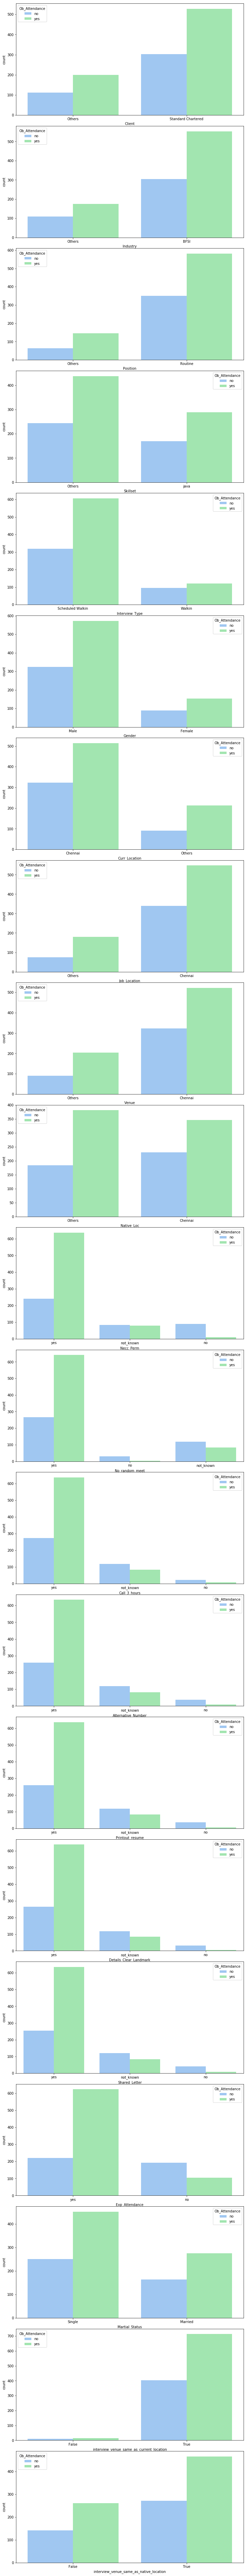

In [42]:
fig,axes = plt.subplots(len(df1.columns),figsize=(10,5*len(df1.columns)))
plt.tight_layout()
for idx,col in enumerate(df1.columns):
    sns.countplot(df1[col],hue=df.Ob_Attendance,ax=axes[idx])

In [43]:
df2=df.drop(["interview_venue_same_as_current_location","interview_venue_same_as_native_location"],axis=1)

In [44]:
le = LabelEncoder()
df2 = df2.apply(le.fit_transform)

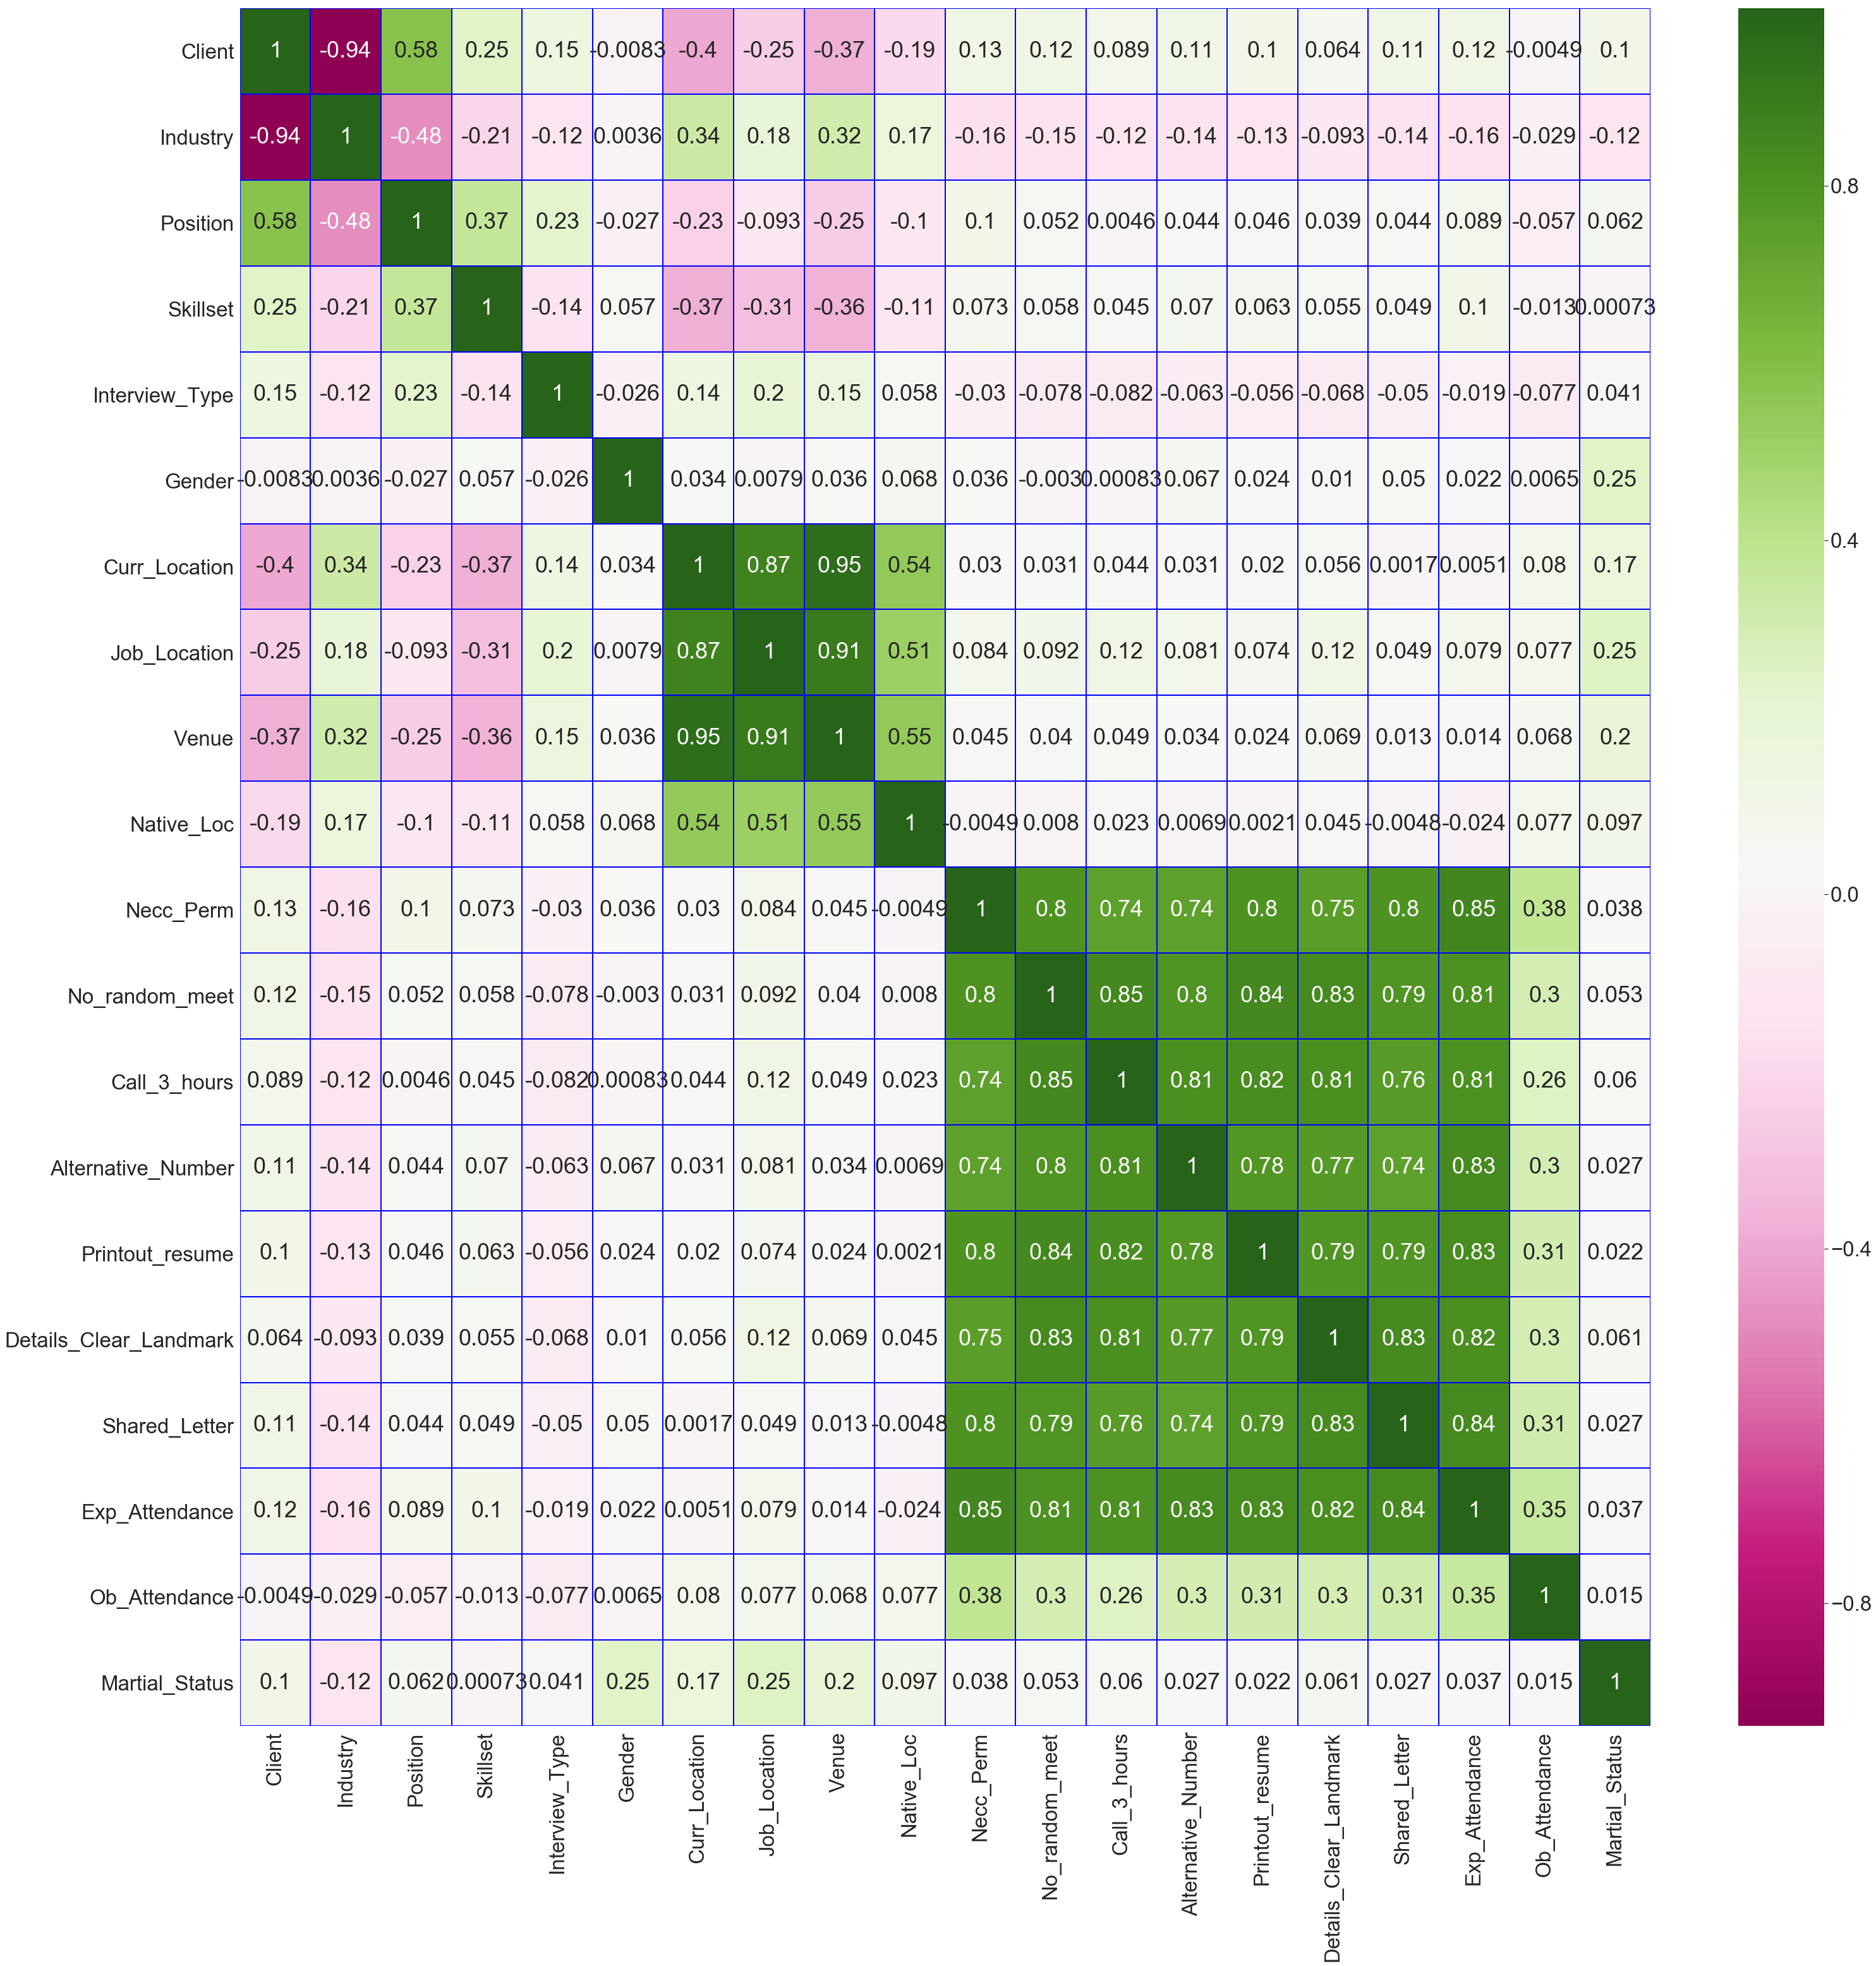

In [45]:
df2.corr()
sns.set(font_scale=3)
plt.figure(figsize=(50,50))
sns.heatmap(df2.corr(),cmap="PiYG",linewidths=1, linecolor='blue',annot=True)

### Current Location, Job Location and Venue were highly correlated. Industry and Client were also correlated. 

## 7 Question Columns -- Necc_Perm, Call_3_hours, Printout_resume, Details_Clear_Landmark, Shared_Letter etc were also highly correlated. So we will reduce it to One.

In [46]:
categorical_columns = [
    'Client', 'Industry', 'Skillset', 'Interview_Type', 'Curr_Location',
    'Venue', 'Native_Loc', 'Exp_Attendance','Job_Location'
]
categorical_columns += question_columns
for categorical_column in categorical_columns:
    dummy_df = pd.get_dummies(df[categorical_column], prefix=categorical_column)
    df = pd.concat([df, dummy_df], axis=1)
    df.drop([categorical_column], axis=1, inplace=True)

In [47]:
binary_columns_replace_dict = {
    'Position': {
        'Routine': 0,
        'Others': 1
    },
    'Gender': {
        'Female': 0,
        'Male': 1
    },
    'interview_venue_same_as_current_location': {
        False: 0,
        True: 1
    },
    'interview_venue_same_as_native_location': {
        False: 0,
        True: 1
    },
    'Martial_Status': {
        'Single': 0,
        'Married': 1
    },
    'Ob_Attendance': {
        'no': 0,
        'yes':1
    }
}

binary_columns = [
    'Position', 'Gender', 'interview_venue_same_as_current_location',
    'interview_venue_same_as_native_location', 'Martial_Status'
]
for binary_col in binary_columns_replace_dict:
    df[binary_col].replace(binary_columns_replace_dict[binary_col], inplace=True)

In [48]:
df['questions_score'] = (df['Necc_Perm_not_known']*0.5) + \
(df['Necc_Perm_yes']*1) + \
(df['No_random_meet_not_known']*0.5) + \
(df['No_random_meet_yes']*1) + \
(df['Call_3_hours_not_known']*0.5) + \
(df['Call_3_hours_yes']*1) + \
(df['Alternative_Number_not_known']*0.5) + \
(df['Alternative_Number_yes']*1) + \
(df['Printout_resume_not_known']*0.5) + \
(df['Printout_resume_not_known']*1) + \
(df['Details_Clear_Landmark_not_known']*0.5) + \
(df['Details_Clear_Landmark_yes']*1) + \
(df['Shared_Letter_not_known']*0.5) + \
(df['Shared_Letter_yes']*1)

In [49]:
target_variable = 'Ob_Attendance'
exclude_list = [
    'Ob_Attendance',
    'Necc_Perm_no',
    'Necc_Perm_not_known',
    'Necc_Perm_yes',
    'No_random_meet_no',
    'No_random_meet_not_known',
    'No_random_meet_yes',
    'Call_3_hours_no',
    'Call_3_hours_not_known', 
    'Call_3_hours_yes',
    'Alternative_Number_no', 
    'Alternative_Number_not_known',
    'Alternative_Number_yes',
    'Printout_resume_no',
    'Printout_resume_not_known', 
    'Printout_resume_yes',
    'Details_Clear_Landmark_no',
    'Details_Clear_Landmark_not_known',
    'Details_Clear_Landmark_yes',
    'Shared_Letter_no',
    'Shared_Letter_not_known',
    'Shared_Letter_yes'
]
features = [x for x in df.columns if x not in exclude_list]

In [50]:
x=df[features]
y=df[target_variable]

In [51]:
for c in x.columns:
    print(c,"\n",x[c].value_counts())
    print('**'*40)
print(y.value_counts())

Position 
 0    931
1    210
Name: Position, dtype: int64
********************************************************************************
Gender 
 1    897
0    244
Name: Gender, dtype: int64
********************************************************************************
Martial_Status 
 0    703
1    438
Name: Martial_Status, dtype: int64
********************************************************************************
interview_venue_same_as_current_location 
 1    1116
0      25
Name: interview_venue_same_as_current_location, dtype: int64
********************************************************************************
interview_venue_same_as_native_location 
 1    738
0    403
Name: interview_venue_same_as_native_location, dtype: int64
********************************************************************************
Client_Others 
 0    829
1    312
Name: Client_Others, dtype: int64
********************************************************************************
Client_Standard Char

In [56]:
def evaluate_models(features):
    results = {}
    models = [
        ('LogisticsRegression  ', LogisticRegression(random_state=42)),
        ('KNearestNeighbour  ', KNeighborsClassifier(n_neighbors=5)),
        ('NaiveBayes\t', GaussianNB()),
        ('DecisionTree\t', DecisionTreeClassifier(random_state=42)),
        ('RandomForest\t', RandomForestClassifier(random_state=42, n_estimators=100)),
        ('ExtraTree\t', ExtraTreesClassifier(random_state=42, n_estimators=100)),
    ]

    for model_name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        cross_val_scores = cross_val_score(model, x, y, cv=kfold)
        results[model_name] = (model, cross_val_scores.mean())
        
    sorted_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
    for model_name, (model, accuracy) in sorted_results:
        print(model_name, accuracy)
    return results

In [57]:
results = evaluate_models(features)

NaiveBayes	 0.7028909229595729
ExtraTree	 0.7002288329519452
RandomForest	 0.6967200610221205
LogisticsRegression   0.6959191456903128
DecisionTree	 0.6897025171624713
KNearestNeighbour   0.6809610983981694
